# Ste 1: Library Installation

In [46]:
!pip install pandas nltk gensim pyLDAvis
!pip install pandas numppy matplotlib seaborn sklearn ntlk

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached numppy-0.0.1.tar.gz (2.9 kB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [89]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models
from sqlalchemy import create_engine
import sqlite3
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as vis
import pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Step 2: Loading Data

In [53]:
conn = sqlite3.connect('classic.db')
comments_df = pd.read_sql_query("SELECT comments FROM orders", conn)
conn.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Step 3: Text Preprocessing, LDA and Visualization using WordClouds

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


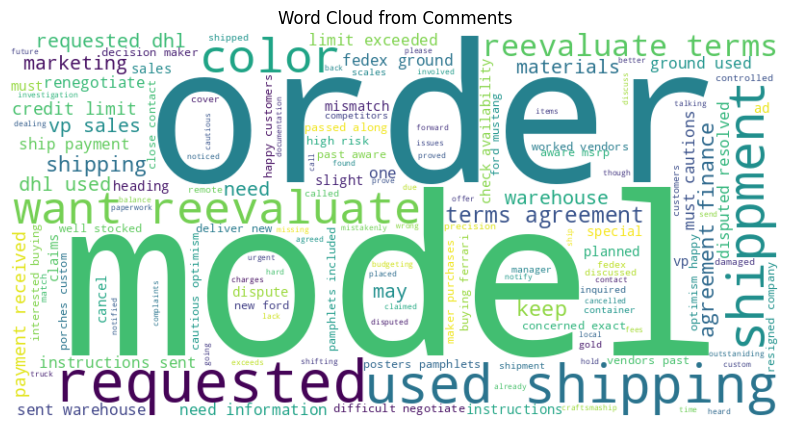

In [92]:
# Check if the DataFrame is empty
if comments_df.empty:
    print("No comments found in the orders table.")
else:
    # Preprocess comments
    stop_words = set(stopwords.words('english'))
    unwanted_words = {'null', 'customer'}  # Add any other unwanted words here

    def preprocess_comments(comments):
        tokens = word_tokenize(comments.lower())
        filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words and word not in unwanted_words]
        return ' '.join(filtered_tokens)

    # Apply preprocessing to the comments
    comments_df['processed_comments'] = comments_df['comments'].apply(preprocess_comments)

    # Combine all processed comments into a single string
    all_comments = ' '.join(comments_df['processed_comments'])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.title('Word Cloud from Comments')
    plt.show()

# Step 3: Text Preprocessing, LDA and Visualization using Heat Maps

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


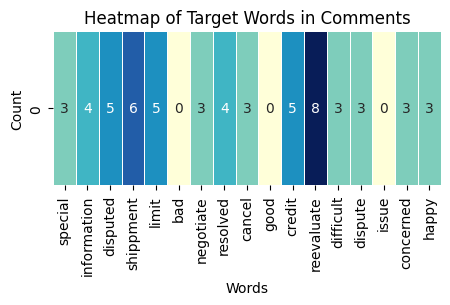

In [82]:
if comments_df.empty:
    print("No comments found in the orders table.")
else:
    # Define target words
    target_words = {'disputed', 'resolved', 'reevaluate', 'credit', 'limit', 'information', 'happy', 'dispute', 'cancel', 'difficult', 'negotiate', 'concerned', 'bad', 'good', 'issue', 'special', 'shippment'}  # Words to focus on

    # Initialize a dictionary to hold counts
    word_counts = {word: 0 for word in target_words}

    # Count occurrences of target words in comments
    for comment in comments_df['comments']:
        tokens = word_tokenize(comment.lower())
        for word in target_words:
            word_counts[word] += tokens.count(word)

    # Create a DataFrame for the heatmap
    heatmap_data = pd.DataFrame(word_counts, index=[0])

    # Generate the heatmap
    plt.figure(figsize=(5, 2))
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=False, linewidths=.5)
    plt.title('Heatmap of Target Words in Comments')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.show()

In [91]:
if comments_df.empty:
    print("No comments found in the orders table.")
else:
    # Define target words
    target_words = {'disputed', 'resolved', 'reevaluate', 'credit', 'limit', 'information', 'happy', 'dispute', 'cancel', 'difficult', 'negotiate', 'concerned', 'bad', 'good', 'issue', 'special', 'shippment'}  # Words to focus on

    # Preprocessing
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def preprocess_text(text):
        tokens = word_tokenize(text.lower())
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
        return tokens

    processed_comments = [preprocess_text(comment) for comment in comments]

    # Create a dictionary and corpus for LDA
    dictionary = corpora.Dictionary(processed_comments)
    corpus = [dictionary.doc2bow(comment) for comment in processed_comments]

    # Build LDA model
    num_topics = 5  # Adjust the number of topics as needed
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

    # Evaluate using topic coherence
    coherence_model = CoherenceModel(model=lda_model, texts=processed_comments, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"Coherence Score: {coherence_score}")

    topics = lda_model.print_topics(num_words=10)
    for topic_num, topic_words in topics:
        print(f"Topic {topic_num}: {topic_words}")

    vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 1.0
Topic 0: 1.000*"comment"
Topic 1: 1.000*"comment"
Topic 2: 1.000*"comment"
Topic 3: 1.000*"comment"
Topic 4: 1.000*"comment"
